The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

https://www.cs.toronto.edu/~kriz/cifar.html

In this exercise, we will use what we just leaned to create a cat classifier. We have prepared a dataset of 500 images and in this exercise we will teach a machine learning algorithm to distinguish which ones are images of cats and which ones aren't.

In [2]:
#helper functions

import csv
import json
import numpy as np
import matplotlib.pyplot as plt


def plot_image(data, labels, im_idx=0):
    im = data[im_idx, :]

    im_r = im[0:1024].reshape(32, 32)
    im_g = im[1024:2048].reshape(32, 32)
    im_b = im[2048:].reshape(32, 32)

    img = np.dstack((im_r, im_g, im_b))

    print("label: ", labels[im_idx])

    plt.imshow(img)
    plt.show()




In [3]:
import csv
import json
import numpy as np
import requests

def load_cat_data(url):
    labels = []
    data = []

    # Fetch the remote CSV file
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Read the CSV content as text
        csv_text = response.text

        # Parse the CSV content using csv.reader
        reader = csv.reader(csv_text.splitlines())

        for row in reader:
            labels.append(row[0])
            data.append(json.loads(row[1]))

        return np.array(data, dtype='uint8'), np.array(labels)
    else:
        raise Exception(f"Failed to fetch data from {url}. Status code: {response.status_code}")


In [14]:
url='https://raw.githubusercontent.com/niranjanmeegammana/ML-preview/main/data/Cats.csv'

# Reading the data
data, labels = load_cat_data(url)

# We can now look at the data we loaded, for example
print(data.shape)
print (data[0])
print(data)


(500, 3072)
[158 156 156 ... 103 102 103]
[[158 156 156 ... 103 102 103]
 [ 37  31  34 ...  70  69  63]
 [254 255 255 ... 132 131 128]
 ...
 [ 42  46  47 ...  73  72  63]
 [ 20  26  73 ...  41  40  41]
 [169 119 114 ... 125 125 121]]


In [15]:
labels[:20]

array(['cat', 'not cat', 'not cat', 'not cat', 'not cat', 'not cat',
       'cat', 'not cat', 'not cat', 'not cat', 'not cat', 'not cat',
       'not cat', 'cat', 'cat', 'not cat', 'cat', 'not cat', 'not cat',
       'cat'], dtype='<U7')

In [19]:
for i in range (10):
  print(data[i][:10], labels[i])

[158 156 156 156 157 159 160 160 160 160] cat
[ 37  31  34  71  96  74  67  87 106 126] not cat
[254 255 255 255 255 255 255 255 255 255] not cat
[227 223 224 228 230 228 227 229 230 229] not cat
[214 212 214 212 214 216 218 214 213 212] not cat
[250 248 249 249 248 248 247 247 247 247] not cat
[255 251 250 252 249 250 252 248 251 251] cat
[195 185 204 214 200 161 140 155 216 223] not cat
[191 190 190 176 168 174 186 198 185 173] not cat
[150 151 152 154 157 159 159 160 161 165] not cat


label:  cat


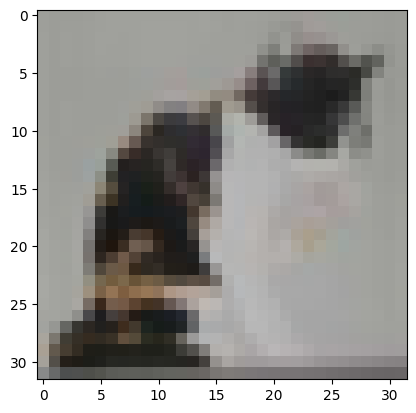

label:  not cat


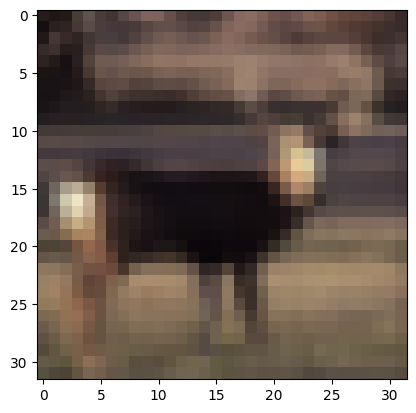

label:  not cat


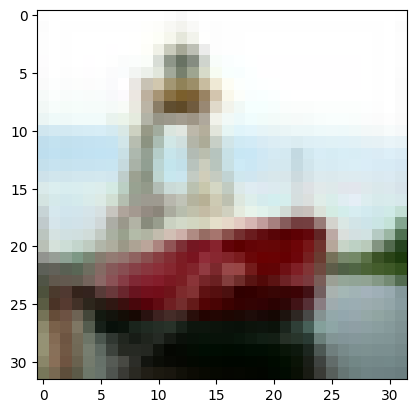

label:  not cat


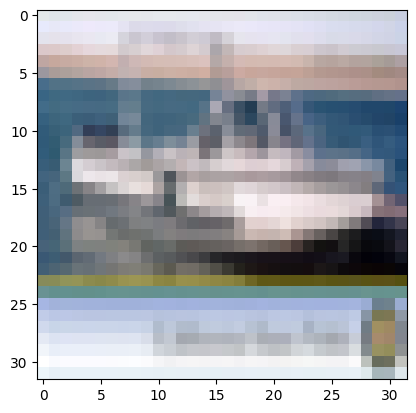

label:  not cat


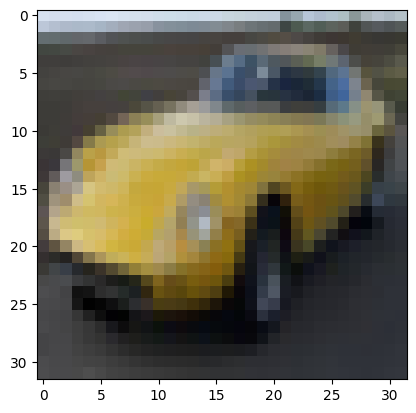

In [26]:
# The images are actually stores as lists of numbers, where each number represents the color of one pixel in the image
# We can now look at the data we loaded, for example
for i in range (5):
	plot_image(data, labels, i)


In [29]:
from collections import Counter
# Count the occurrences of each item in the labels list
label_counts = Counter(labels)

# Get the most common items and their counts in descending order
most_common_items = label_counts.most_common()

# Display the result
print(most_common_items)


[('cat', 250), ('not cat', 250)]


In [32]:

from sklearn import model_selection

#Preparing data and create training and test inputs and labels
inputs_train, inputs_test, labels_train, labels_test = \
       model_selection.train_test_split(data, labels, test_size=0.2, random_state=0)

In [55]:
inputs_train[:10]

array([[112, 102, 108, ...,  85,  83,  91],
       [174, 170, 171, ...,  86,  89, 103],
       [157, 156, 157, ..., 202, 202, 199],
       ...,
       [ 93, 102, 117, ...,  45,  41,  63],
       [123, 123, 124, ..., 110, 109, 111],
       [106, 105, 108, ..., 183, 192, 196]], dtype=uint8)

In [56]:
inputs_train.shape

(400, 3072)

In [36]:
labels_train[0:10]

array(['cat', 'not cat', 'not cat', 'cat', 'cat', 'not cat', 'not cat',
       'not cat', 'not cat', 'not cat'], dtype='<U7')

In [38]:
from sklearn.neighbors import KNeighborsClassifier


# Selecting the classifier we want to use
knn = KNeighborsClassifier(n_neighbors=5)

# Learning based on inputs and labels from our dataset
knn.fit(inputs_train, labels_train)

KNeighborsClassifier()

In [40]:
from sklearn.metrics import accuracy_score

# Predict what the classes are based on the testing data
predictions = knn.predict(inputs_test)

# Print the score on the testing data
print("KNN Testing Set Score:")
print(accuracy_score(labels_test, predictions)*100)

KNN Testing Set Score:
63.0


label:  cat


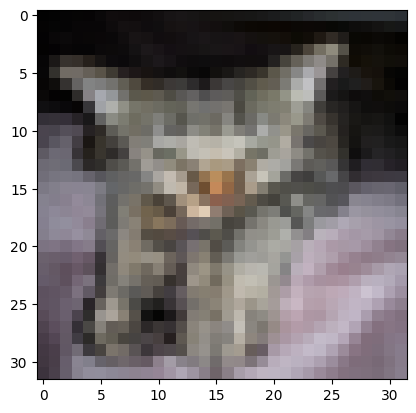

Prediction: cat


In [41]:
# Specify which image you want to show
image_id = 6

# Visualize the image
plot_image(inputs_test, labels_test, image_id)

# Use the computer to predict if the image is a cat and print it
print('Prediction:', knn.predict([inputs_test[image_id]])[0])

In [61]:
from PIL import Image
import numpy as np
from skimage import transform
from google.colab import files

# Allow the user to upload an image
uploaded = files.upload()

# Get the filename of the uploaded image
uploaded_filename = next(iter(uploaded))

# Load the uploaded image using PIL
original_image = Image.open(uploaded_filename)

# Resize the image to 32x32
resized_image = original_image.resize((32, 32), Image.ANTIALIAS)

# Convert the resized image to a numpy array
image_array = np.array(resized_image)

# Flatten the 3D image array (32x32x3) to a 1D array with 3072 features
flattened_image_array =image_array.reshape(-1)

# Display the shape of the flattened image array
print(flattened_image_array.shape)


Saving deer7.png to deer7 (4).png
(3072,)


<ipython-input-61-c29990c18a4b>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = original_image.resize((32, 32), Image.ANTIALIAS)


In [63]:
flattened_image_array.shape


(3072,)

In [64]:

# Reshape the flattened_array to match the input shape expected by the KNN model.
flat_array = flattened_image_array.reshape(1, -1)
print(flat_array)

# Make predictions using the KNN model
prediction = knn.predict(flat_array)

# Display the prediction
print(f"The predicted class label for the image is: {prediction[0]}")


[[127 120 108 ... 156 148 116]]
The predicted class label for the image is: not cat


In [69]:

from PIL import Image
import numpy as np
from skimage import transform
from google.colab import files

# Allow the user to upload an image
uploaded = files.upload()

# Get the filename of the uploaded image
uploaded_filename = next(iter(uploaded))

# Load the uploaded image using PIL
original_image = Image.open(uploaded_filename)

# Resize the image to 32x32
resized_image = original_image.resize((32, 32), Image.ANTIALIAS)

# Convert the resized image to a numpy array
image_array = np.array(resized_image)

# Flatten the 3D image array (32x32x3) to a 1D array with 3072 features
flattened_image_array =image_array.reshape(-1)

# Display the shape of the flattened image array
print(flattened_image_array.shape)


# Reshape the flattened_array to match the input shape expected by the KNN model.
flat_array = flattened_image_array.reshape(1, -1)
print(flat_array)

# Make predictions using the KNN model
prediction = knn.predict(flat_array)

# Display the prediction
print(f"The predicted class label for the image is: {prediction[0]}")



Saving download.jpeg to download.jpeg
(3072,)
[[254 254 254 ... 253 253 253]]
The predicted class label for the image is: not cat


<ipython-input-69-b80b29a07acc>:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = original_image.resize((32, 32), Image.ANTIALIAS)
